In [552]:
clear all;

## Fonction de creation du noyau

## Definition des variables

### Definition des variables d'entre

In [ ]:
clear all;
% points de données d'entrée
X = 0:0.01:0.99;
X = X';

### Definition de modele : 

On commence par un modele alearatoire

In [554]:
% definition de modele
y = cos(2*pi*X);

### Repartition des variables en entrainement et test

In [555]:

X_test = X(1:2:end);
y_test = y(1:2:end);
X_train = X(2:2:end);
y_train = y(2:2:end);
n = length(X); % nombre de points de données
n2 = length(X_train);
% size(y_train)

### Definition des parametres 

In [556]:
 % parametres initiaux
omega = ones(n2, 1);
size(omega)


ans =

    50     1



## Definition de noyau 

### Implementation de fonction de noyau

fichier noyau.m : 

### Definition de noyau linéaire

In [557]:
% choix de noyau linéaire
choix = 1;
K = zeros(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), choix);
end  
size(K)


ans =

    50    50



## Definition du fonction

La fonction est définie comme suivant : 

$f(\omega, x) = \sum_{i=1}^{n} \omega_i K(x, x_i)$


In [558]:
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);

## Definition de function de risque empirique

La fonction de risque empirique est définit comme suivante :

$ J (\omega, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(\omega_i) - y_i\|^2  $ 


In [559]:
J = @(omega, y) 1/n * norm(f(omega) - y);

## Definition de gradient J

In [560]:
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);

## Gradient descent

In [561]:
alpha = 0.001;
num_iterations = 5000;
hist_omega = zeros(n2, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  hist_omega(:, i) = omega;
  err(i) = J(omega, y_train);
end

In [562]:
err(i)


ans =

    0.3577



In [563]:
norm(gradJ(omega))


ans =

    0.0421



In [564]:
plot(1:i-1, err)

Error using plot
Vectors must be the same length.



## Extraction des omega optimaux

In [565]:
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)


ans =

    0.3577



## Affichage de resultats

On affiche les y_train avec les y que notre model a predit

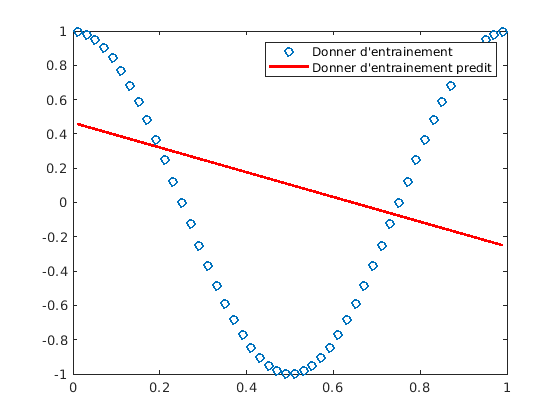

In [566]:
y_train_predit = f(opt_omega);
plot(X_train, y_train, 'o','LineWidth', 2)
hold on
plot(X_train, y_train_predit, 'r','LineWidth', 2)
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Equation normal

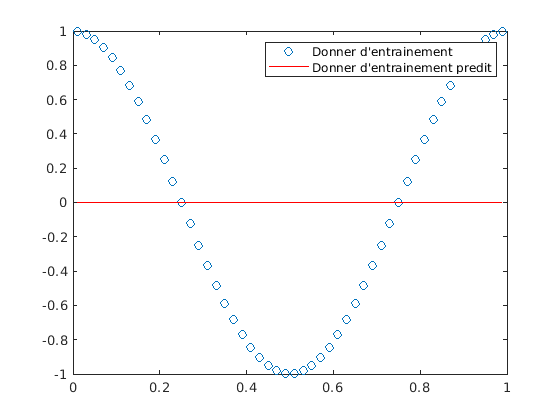

In [567]:
w_et = (K' * K) \ (K' * y_train);
y_opt = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_opt, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Sur les donnees de test

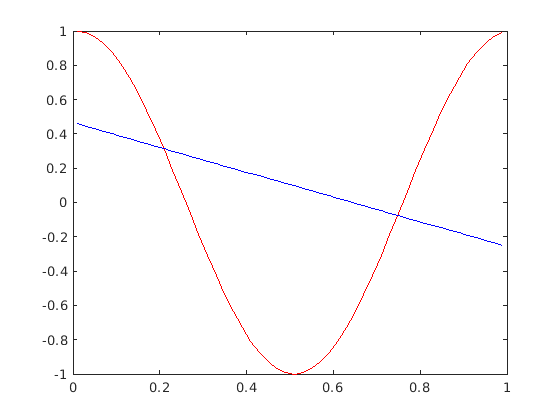

In [392]:
% y de test
y_test_predit = f(opt_omega);
plot(X_train, y_test, 'o')
hold on
plot(X_train, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

In [393]:
% y_train_predit = f(opt_omega, X_train );
norm(y_train_predit - y_train)


ans =

   35.7714



In [394]:
norm(y_test_predit - y_test)


ans =

   35.7714



In [395]:
w_et = (K' * K) \ (K' * y_train);
norm(opt_omega - w_et)
w_et;
opt_omega;



ans =

    5.9707



## Utilisation des autres modèles

$
(1) \quad f^*(x) = |x|, \quad x \in [-1, 1] \\
(2) \quad f^*(x) = 3\|x\|^3 - 2\|x\|^2 + 3\|x\|^2 + 3, \quad x \in [-1, 1]^3 \\
(3) \quad f^*(x) = \sin(x_1 + x_2), \quad x \in [-2, 2]^2 \\
(4) \quad f^*(x) = \frac{1}{3}(x_1 + x_2)^3 - \frac{1}{4}(x_1 + x_2)
$

# Noyeau lineaire

# Fonction 1)

In [396]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 1);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## L'entrainement d'equation

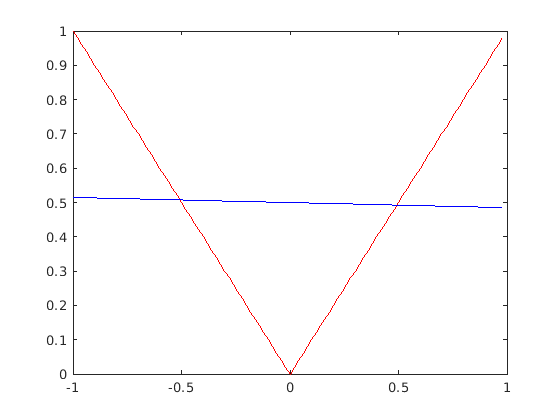

In [397]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [398]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 2.868845e-16
Nombre d'iteration : 113

## Affichage de risque empirique

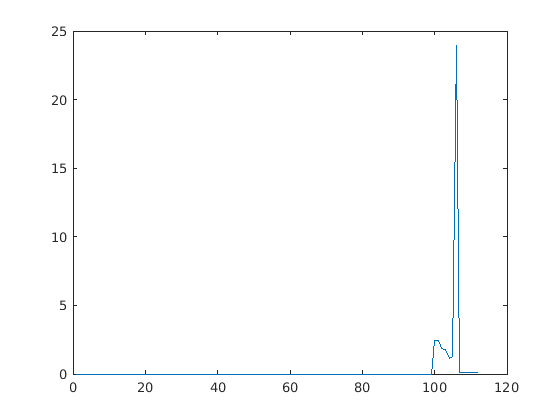

In [399]:
plot(1:i-1, err)

### Entrainement


ans =

    0.1444



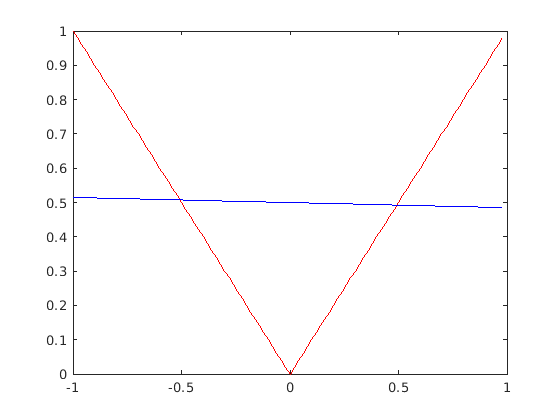

In [400]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

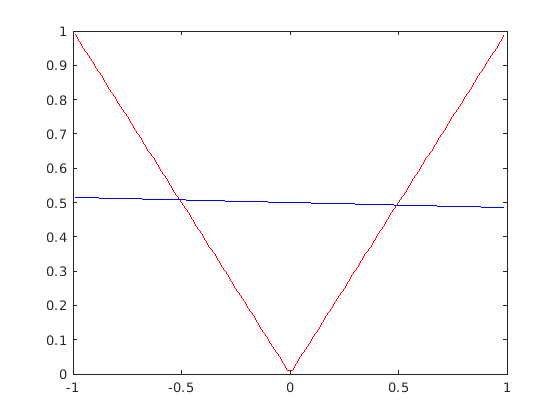

In [401]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

### FONCTION 2)

In [402]:
clear all;
% X = -1:0.01:0.99;
% X = X';
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
% X_train = [X_train,X_train,X_train];
X_test = X(2:2:end,:);
% X_test = [X_test,X_test,X_test];
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K(:, i) = noyau(X_train', X_train(i, :)', 1);
  % end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## L'entrainement d'equation 

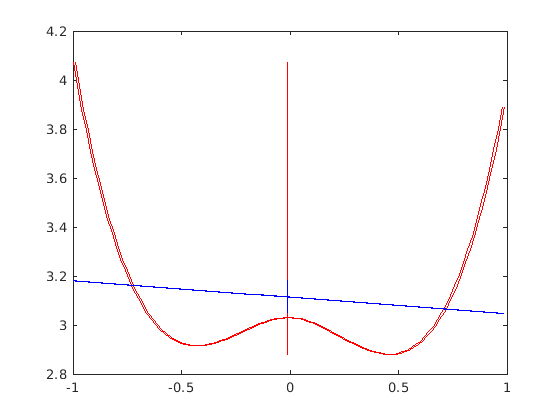

In [403]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent 

In [404]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 4.897518e-15
Nombre d'iteration : 112

## Affiche risque empirique

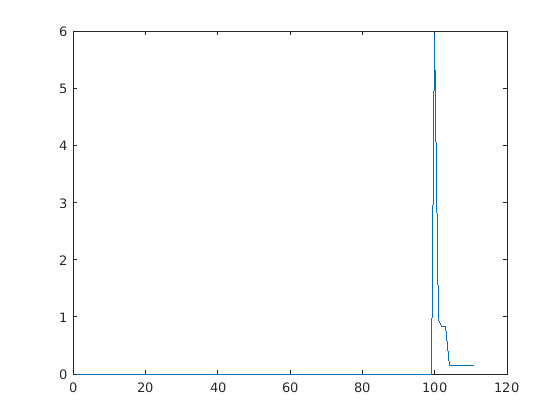

In [405]:
plot(1:i-1, err)

## Entrainement 


ans =

    0.1417



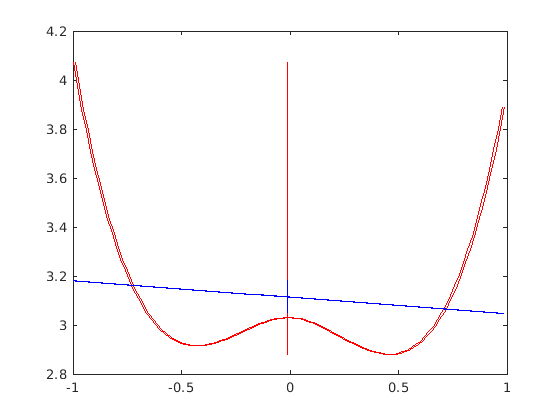

In [406]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

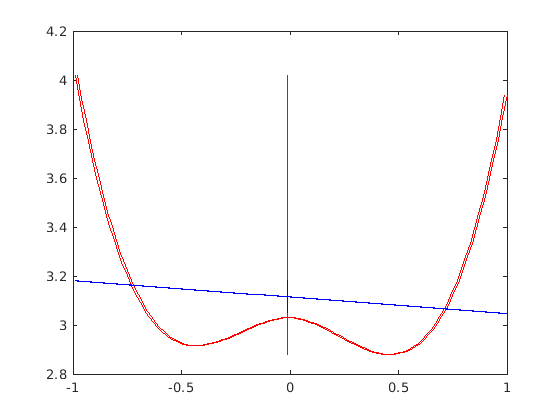

In [407]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

# Fonction 3)

In [408]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K(:, i) = noyau(X_train', X_train(i, :)', 1);
  % end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.0001 * K * omega);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Entrainement



ans =

    0.3310



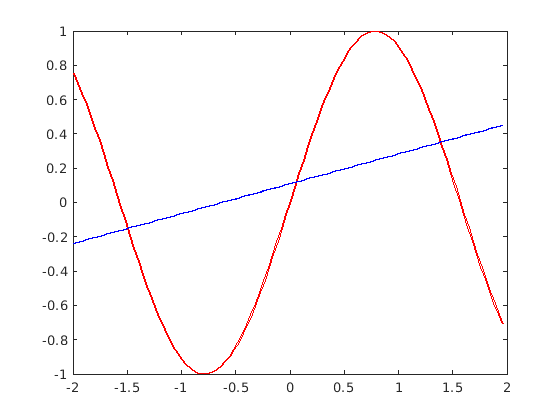

In [409]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [410]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.525312e-14


Nombre d'iteration : 121

## Affichage de risque empirique

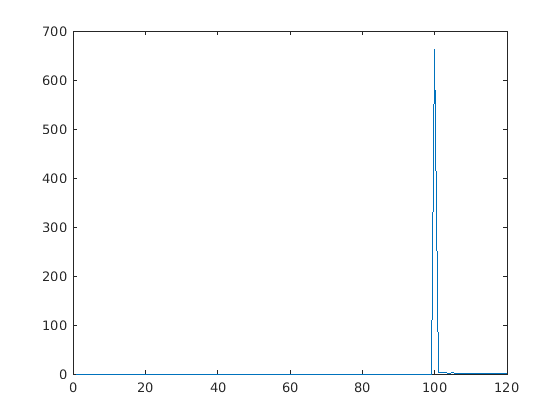

In [411]:
plot(1:i-1, err)

## Entrainement


ans =

    0.3310



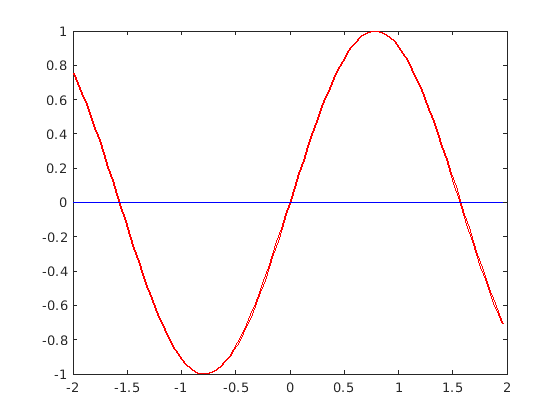

In [412]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

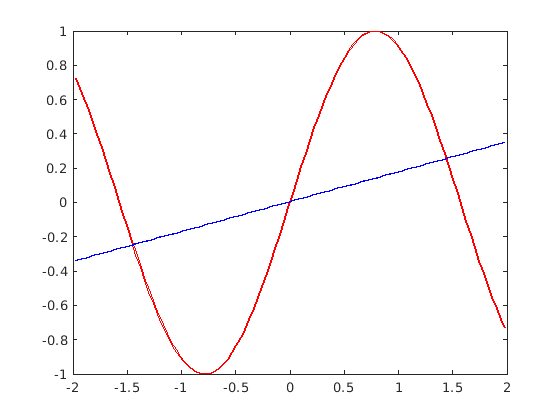

In [413]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
  y_test = modele(3, X_test);

y_test_predit = K * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

# Fonction 4)

In [414]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K(:, i) = noyau(X_train', X_train(i, :)', 1);
  % end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.0001 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement d'equation normal

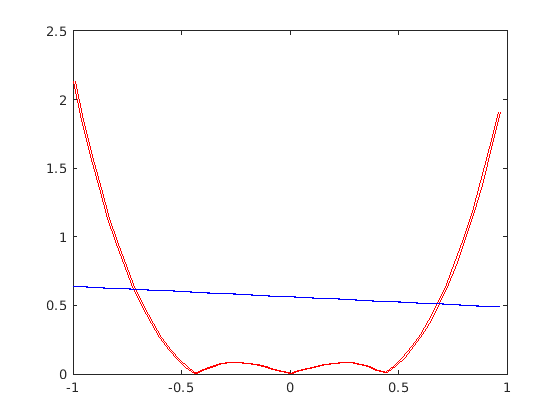

In [415]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [416]:
alpha = 1;
num_iterations = 1000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 8.956863e-15
Nombre d'iteration : 60

## Affichage de risque empirique

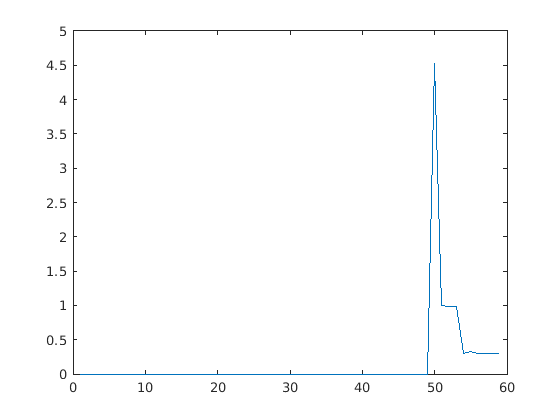

In [417]:
plot(1:i-1, err)

## Entrainement


ans =

    0.2968



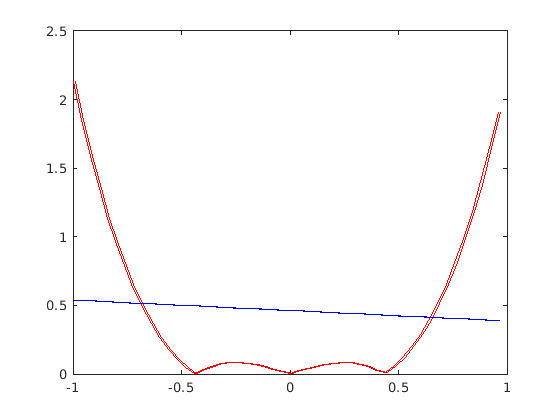

In [418]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## TEST

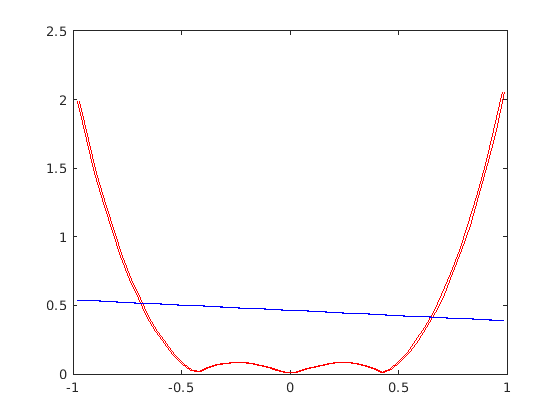

In [419]:
K2 = ones(n2, n2);
  for i = 1:n2 
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau polynomial

# Fonction 1)

In [420]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 2);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement Equation normal 

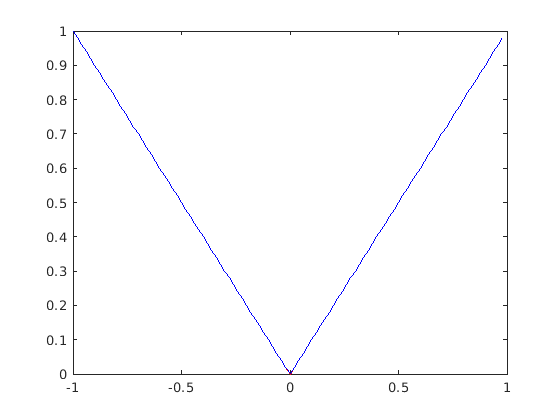

In [421]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [422]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 8.638352e-03
Nombre d'iteration : 5000

## Affichage de risque empirique

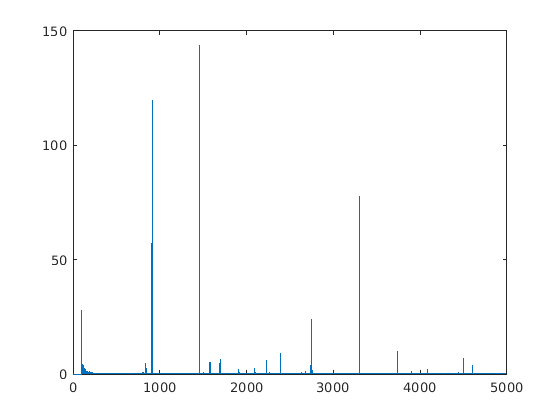

In [423]:
plot(1:i-1, err)

### Entrainement


ans =

    0.1444



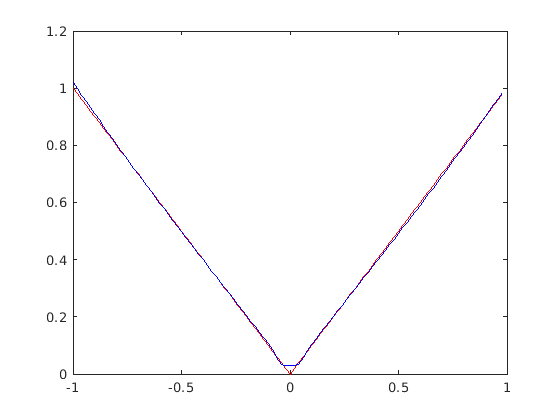

In [424]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## Test

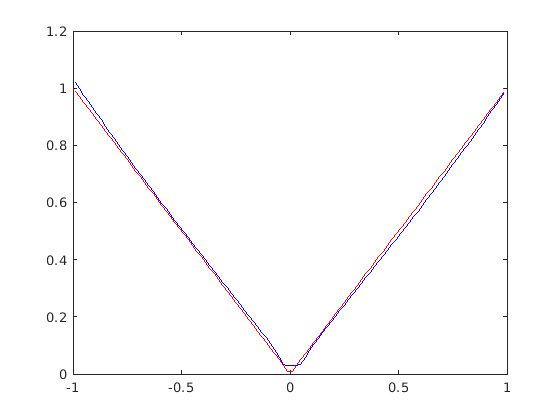

In [425]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

### FONCTION 2)

In [426]:
clear all;
% X = -1:0.01:0.99;
% X = X';
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
% X_train = [X_train,X_train,X_train];
X_test = X(2:2:end,:);
% X_test = [X_test,X_test,X_test];
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K(:, i) = noyau(X_train', X_train(i, :)', 2);
  % end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement equation normal

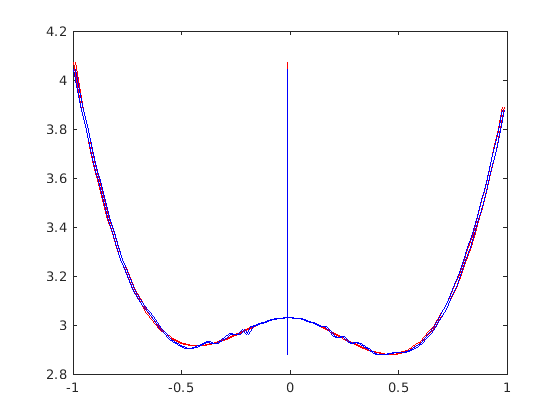

In [427]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [428]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 4.225123e-04
Nombre d'iteration : 10000

## Affichage Risque empirique 

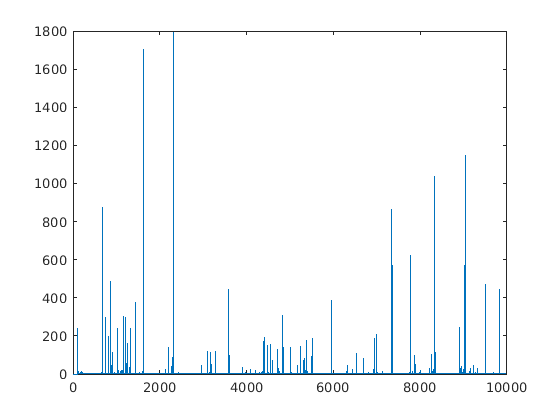

In [429]:
plot(1:i-1, err)

## Entrainement 


ans =

    0.1419



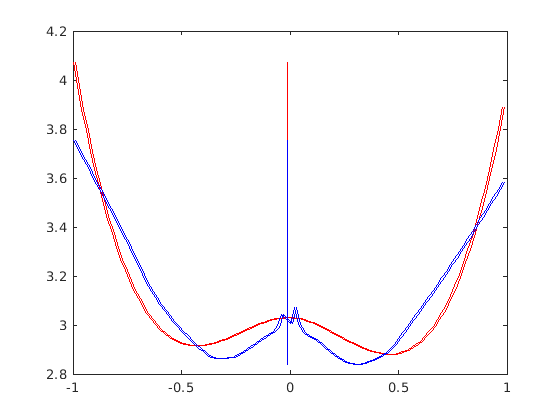

In [430]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## Test

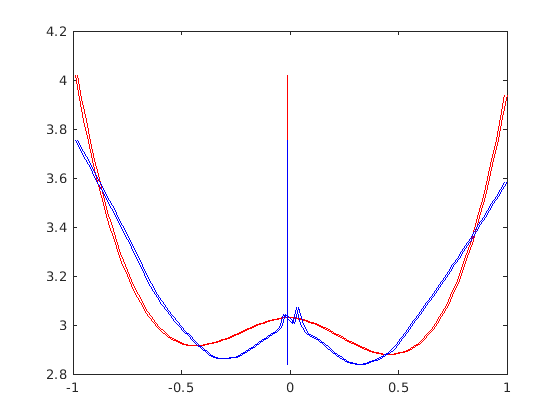

In [431]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 1);
  % end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 3)

In [432]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K(:, i) = noyau(X_train', X_train(i, :)', 2);
  % end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Entrainement d'equation normal



ans =

    0.3310



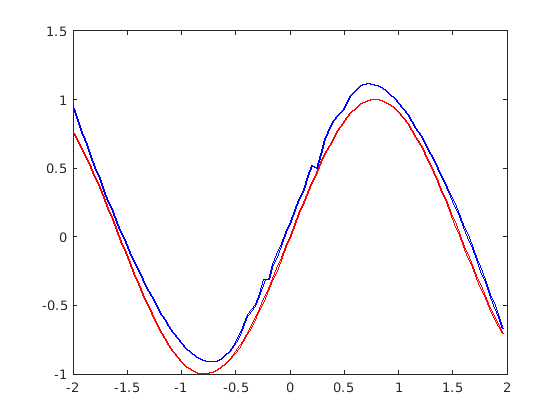

In [433]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [434]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 3.805913e-05
Nombre d'iteration : 50000

## Affichage de risque empirique

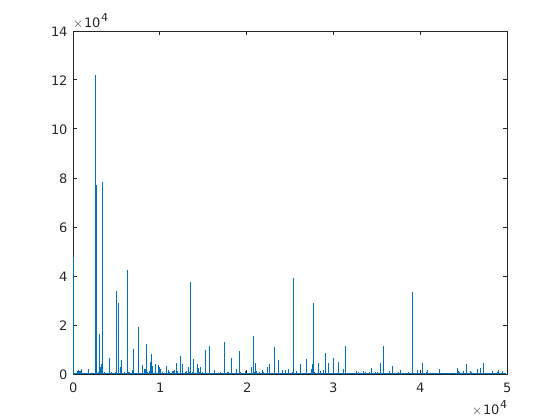

In [435]:
plot(1:i-1, err)

## Entrainement


ans =

    0.3310



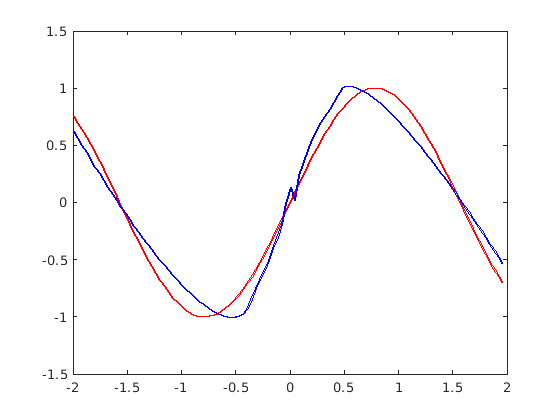

In [436]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## Test

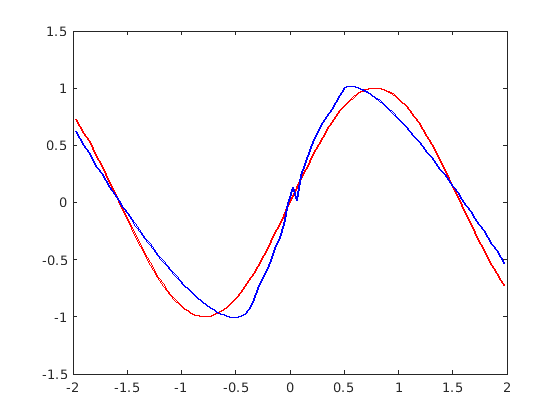

In [437]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 2);
  % end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 4)

In [438]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K(:, i) = noyau(X_train', X_train(i, :)', 2);
  % end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement d'equation normal

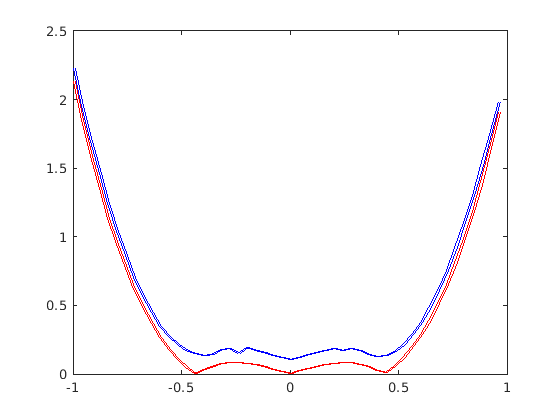

In [439]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [440]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 2.260873e-04
Nombre d'iteration : 50000

## Affichage de risque empirique

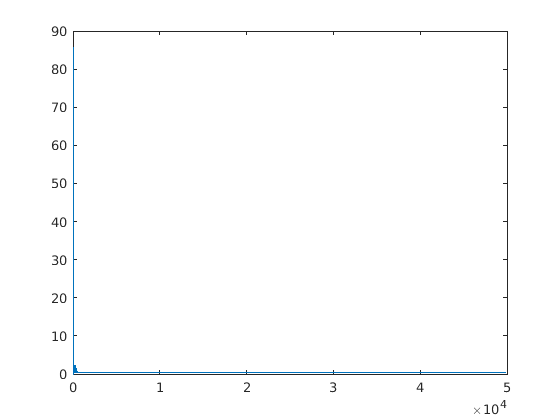

In [441]:
plot(1:i-1, err)

## Entrainement


ans =

    0.2970



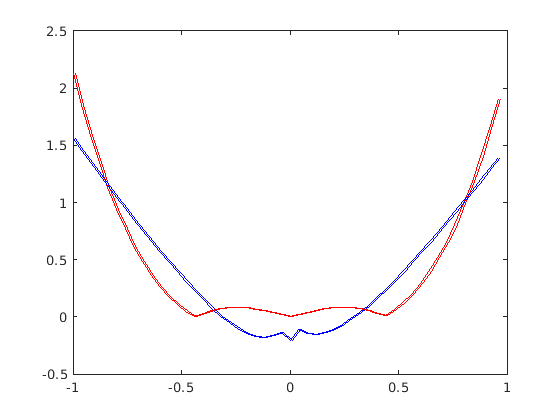

In [442]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## TEST

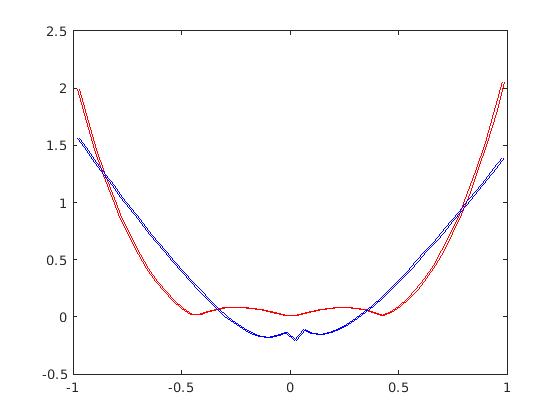

In [443]:
K2 = ones(n2, n2);
  for i = 1:n2
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau Gaussien

# Fonction 1)

In [532]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement Equation normal 

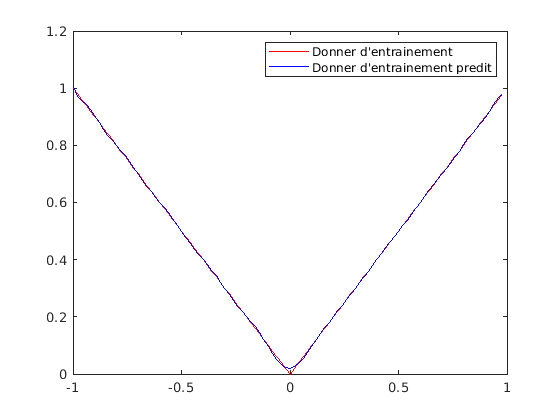

In [533]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r');
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [534]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.480778e-03
Nombre d'iteration : 5000

## Affichage de risque empirique

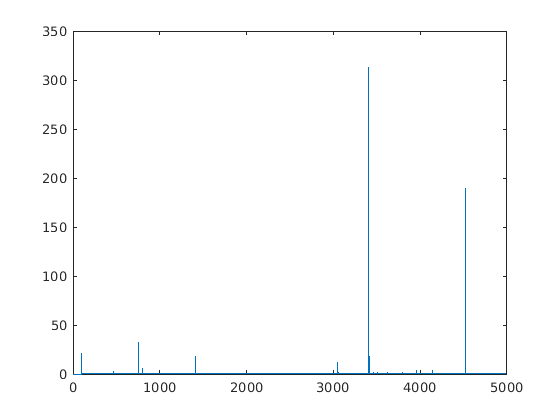

In [535]:
plot(1:i-1, err)

### Entrainement


ans =

    0.1446



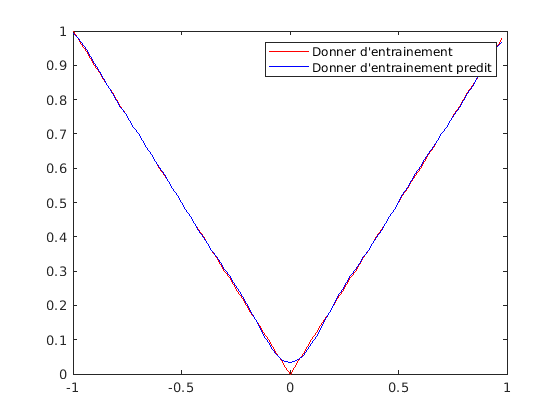

In [536]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## Test

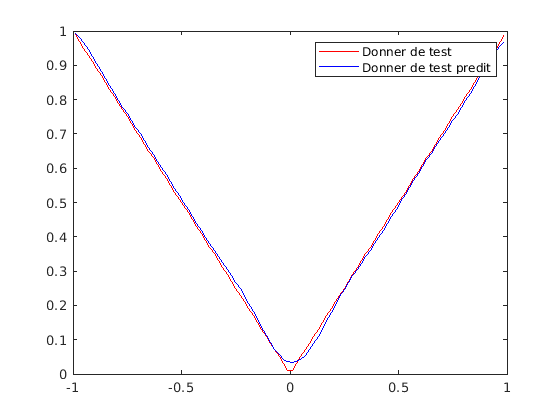

In [537]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(i, :), 3);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

### FONCTION 2)

In [568]:
clear all;
% X = -1:0.01:0.99;
% X = X';
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
% X_train = [X_train,X_train,X_train];
X_test = X(2:2:end,:);
% X_test = [X_test,X_test,X_test];
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 3);
  end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement equation normal

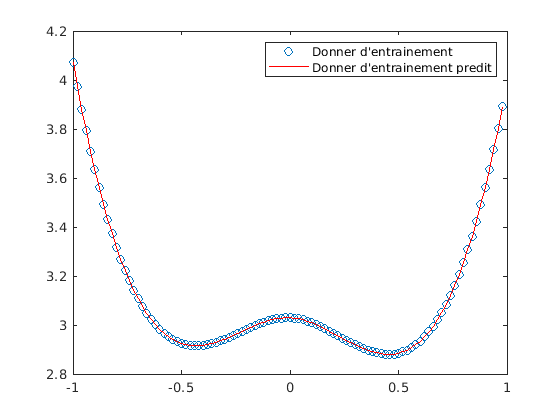

In [569]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train(:, 1), y_train,'o')
hold on
plot(X_train(:, 1), y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [521]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.835516e-06
Nombre d'iteration : 10000

## Affichage Risque empirique 

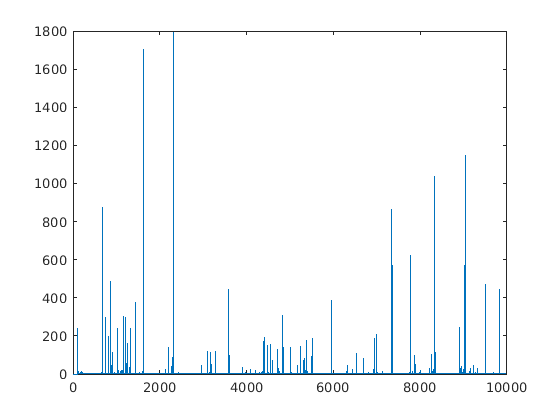

In [453]:
plot(1:i-1, err)

## Entrainement 


ans =

    0.1417



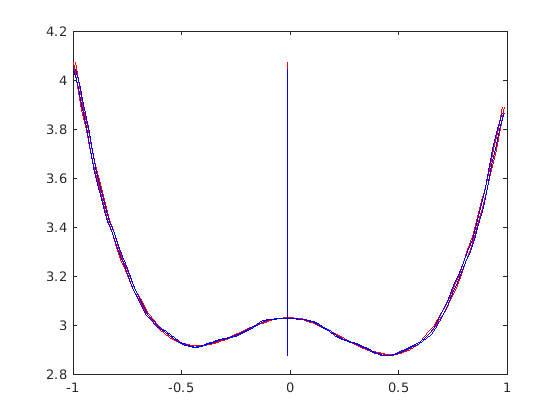

In [522]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

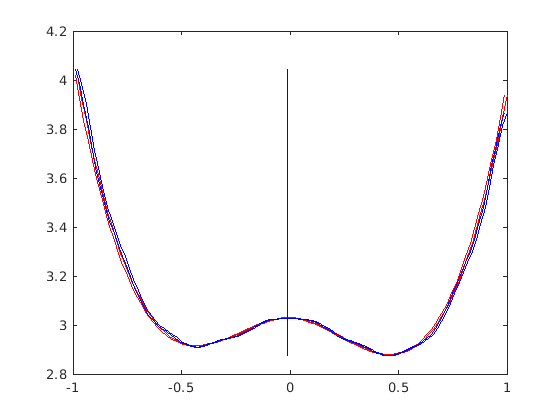

In [523]:
K2 = ones(n2, n2);
for i = 1:n2 
  % for j = 1:n2
    K2(:, i) = noyau(X_test', X_train(i, :)', 3);
  % end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

# Fonction 3)

In [570]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i, j) = noyau(X_train(i, :), X_train(j, :)', 3);
  end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Entrainement d'equation normal



ans =

    0.3310



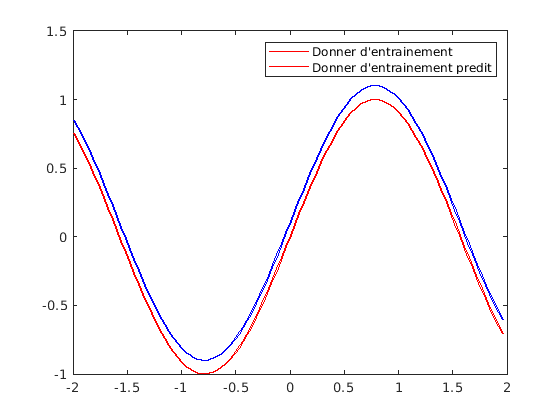

In [571]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [573]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.996605e-08
Nombre d'iteration : 10000

## Affichage de risque empirique

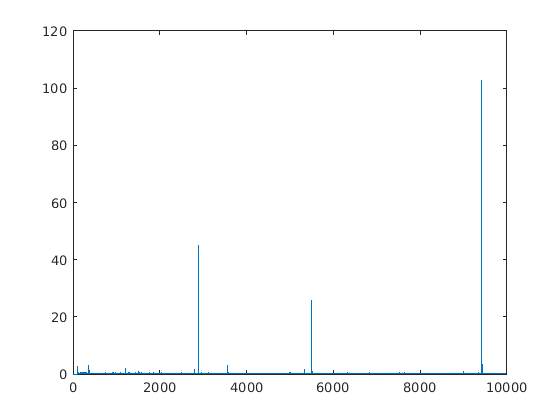

In [574]:
plot(1:i-1, err)

## Entrainement


ans =

    0.3310



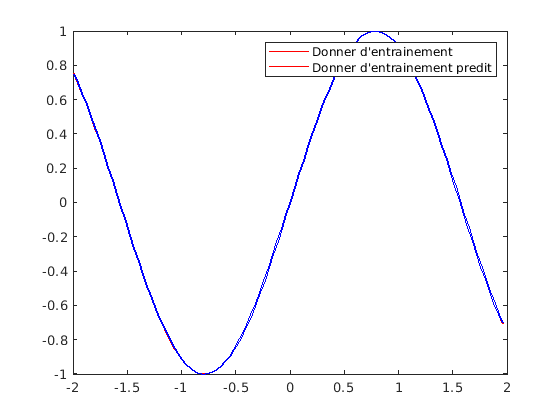

In [575]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

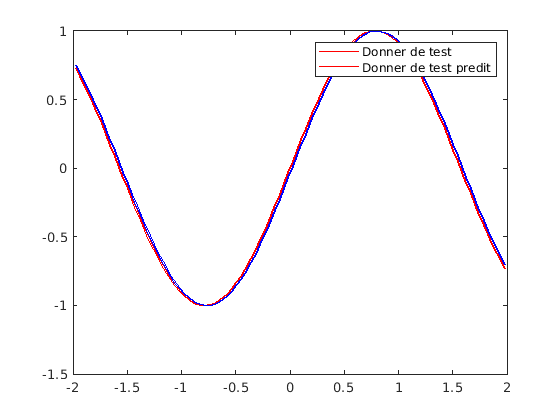

In [576]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
  end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 4)

In [577]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement d'equation normal

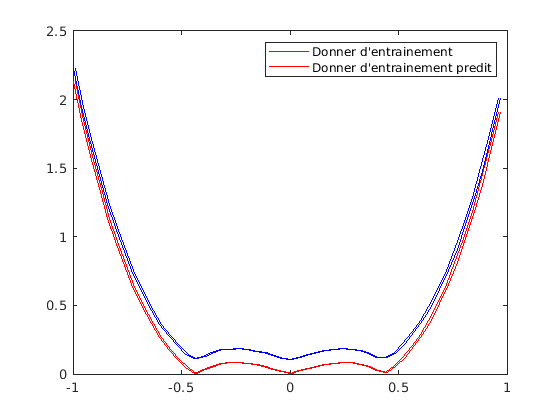

In [581]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [582]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 7.337697e-08
Nombre d'iteration : 47747

## Affichage de risque empirique

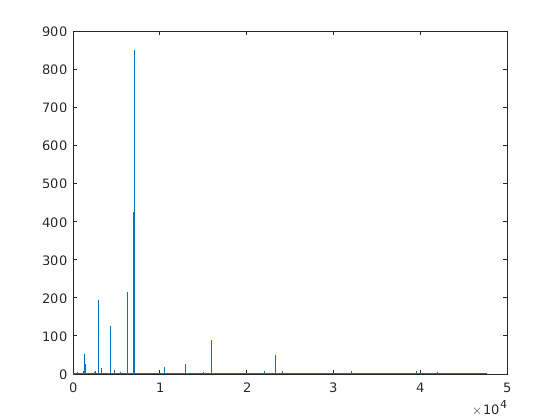

In [583]:
plot(1:i-1, err)

## Entrainement


ans =

    0.2968



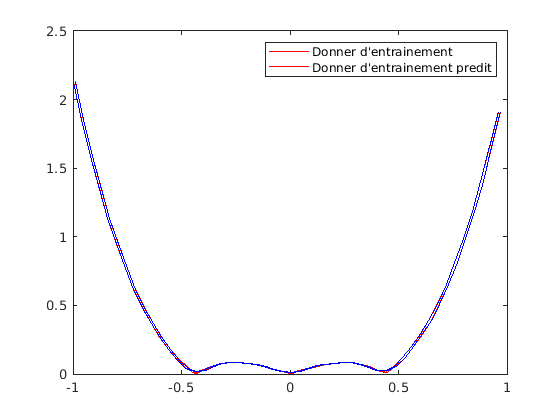

In [584]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## TEST

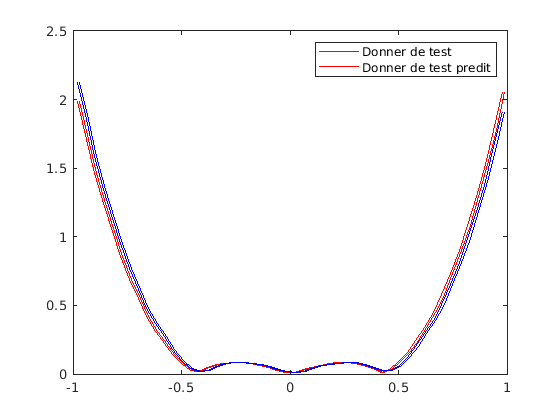

In [585]:
K2 = ones(n2, n2);
  for i = 1:n2
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau Exponentiel

# Fonction 1)

In [595]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement Equation normal 

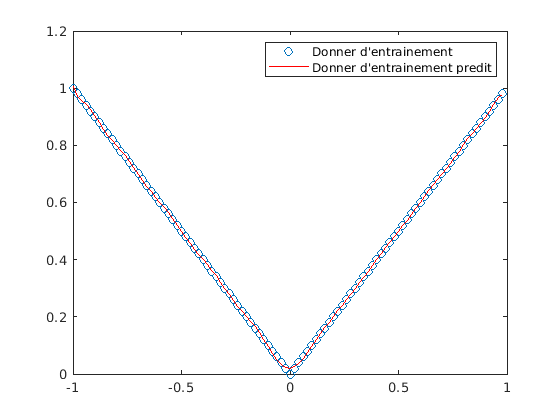

In [596]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [597]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.480778e-03
Nombre d'iteration : 5000

## Affichage de risque empirique

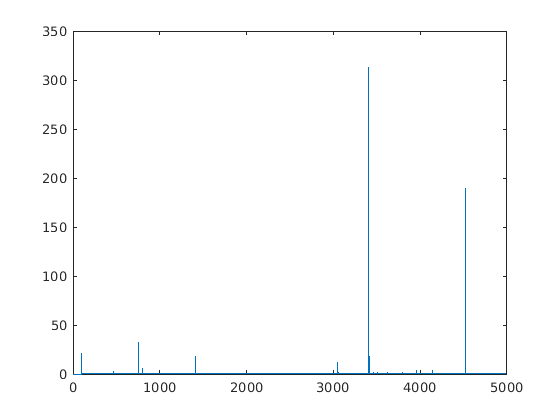

In [590]:
plot(1:i-1, err)

### Entrainement


ans =

    0.1446



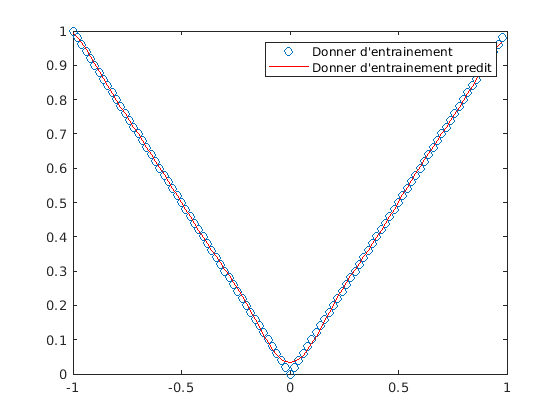

In [598]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## Test

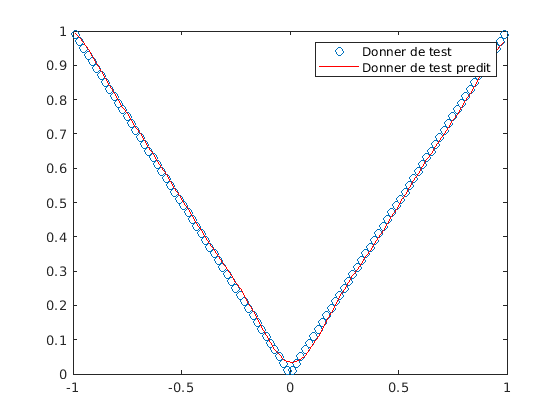

In [599]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

### FONCTION 2)

In [600]:
clear all;
% X = -1:0.01:0.99;
% X = X';
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
% X_train = [X_train,X_train,X_train];
X_test = X(2:2:end,:);
% X_test = [X_test,X_test,X_test];
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement equation normal

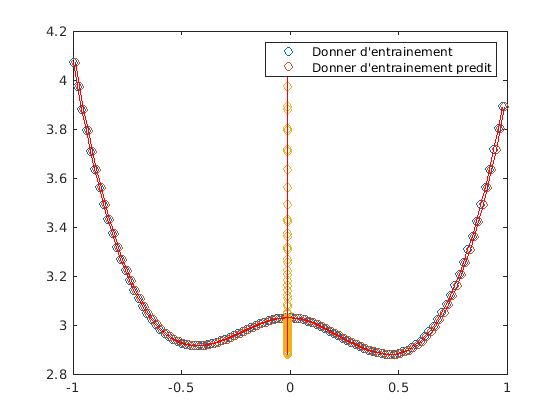

In [601]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [602]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.835516e-06
Nombre d'iteration : 10000

## Affichage Risque empirique 

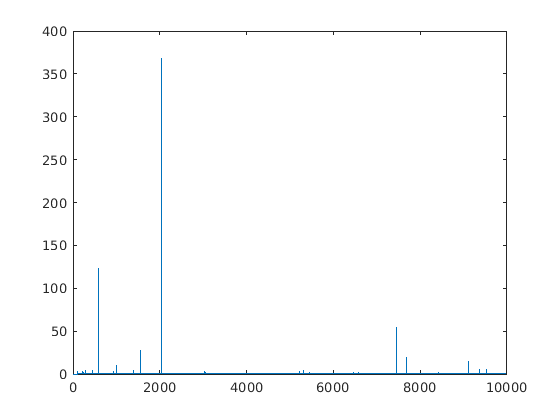

In [603]:
plot(1:i-1, err)

## Entrainement 


ans =

    0.1417



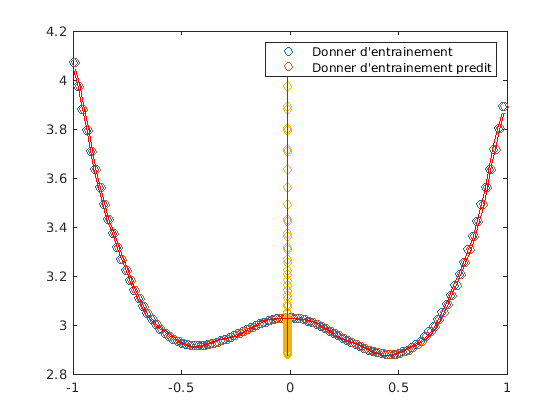

In [606]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Test

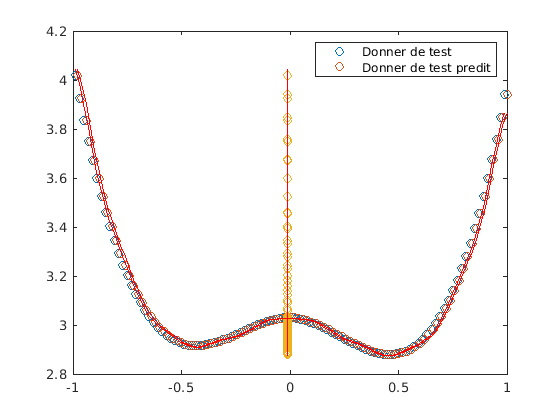

In [607]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 3)

In [608]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Entrainement d'equation normal



ans =

    0.3310



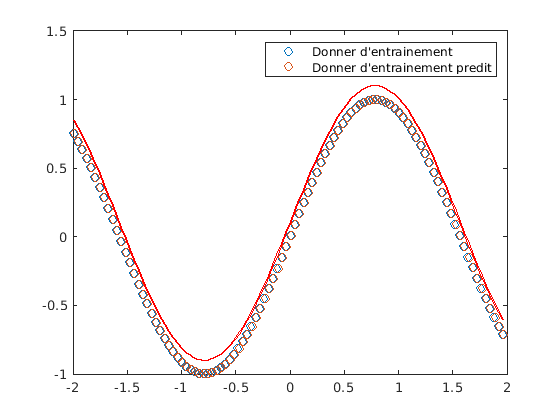

In [609]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [610]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.996605e-08
Nombre d'iteration : 10000

## Affichage de risque empirique

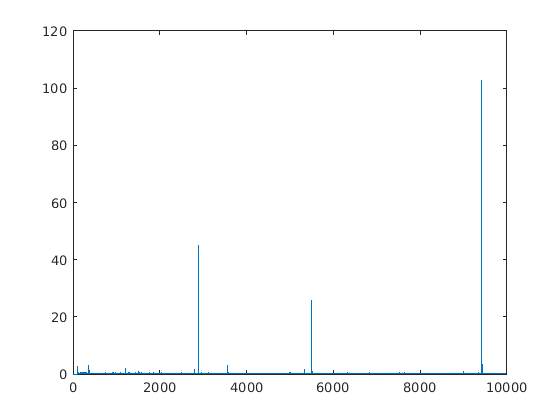

In [611]:
plot(1:i-1, err)

## Entrainement


ans =

    0.3310



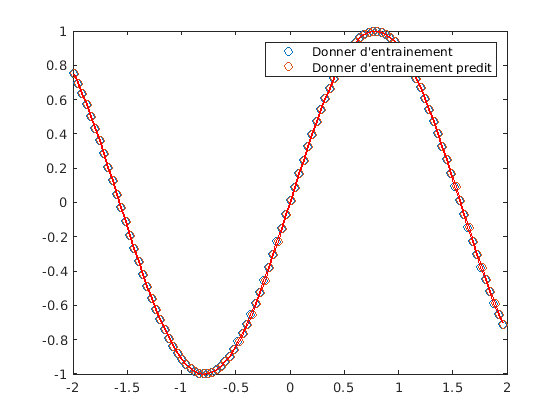

In [613]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Test

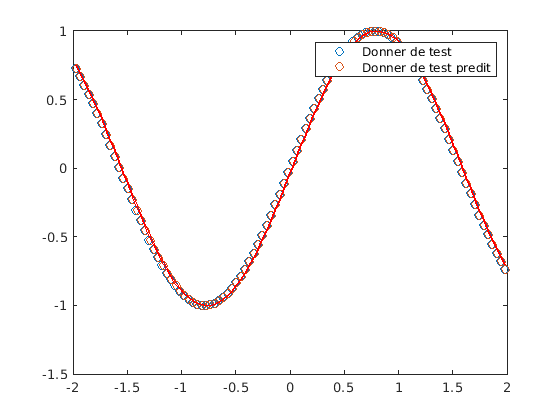

In [616]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

# Fonction 4)

In [621]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement d'equation normal

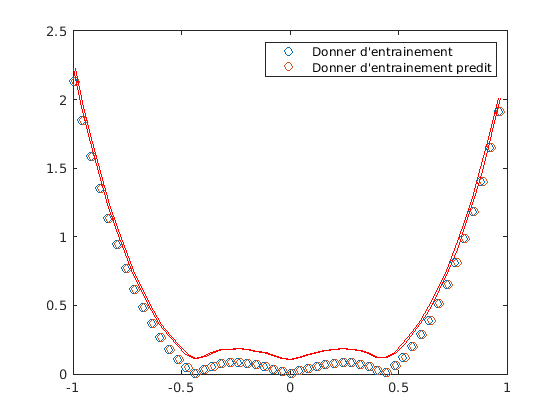

In [618]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [622]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 5.177890e-07
Nombre d'iteration : 10000

## Affichage de risque empirique

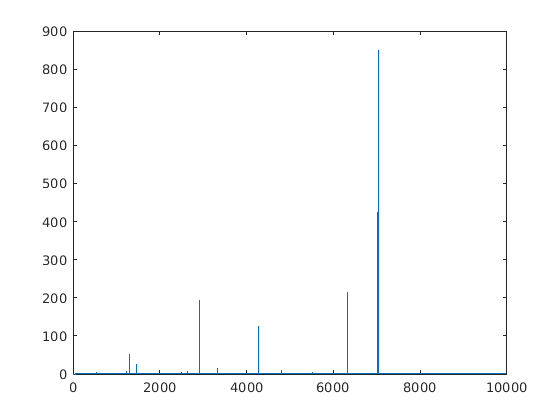

In [623]:
plot(1:i-1, err)

## Entrainement


ans =

    0.2968



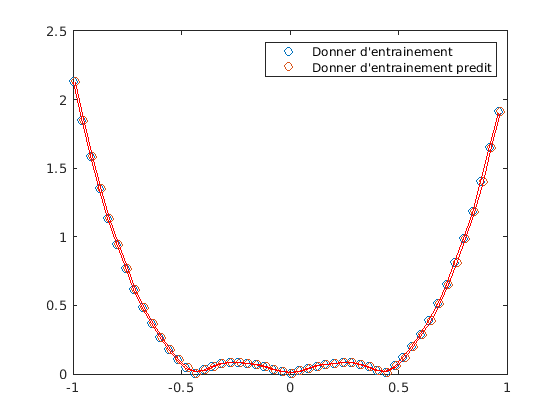

In [624]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## TEST

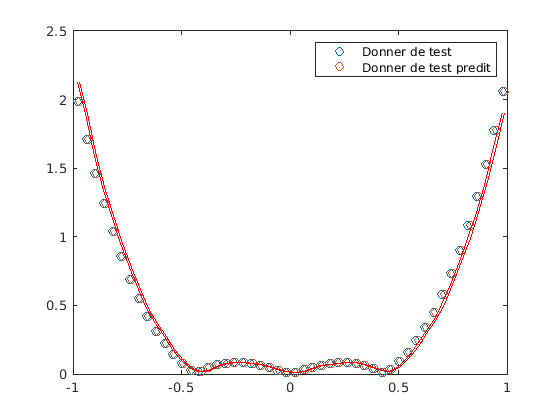

In [626]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 4);
  end  
end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau Laplacien

# Fonction 1)

In [642]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 5);
  end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement Equation normal 

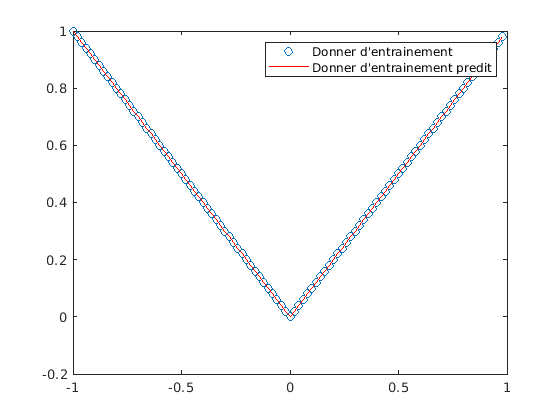

In [643]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r');
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [644]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 4.054638e-04
Nombre d'iteration : 5000

## Affichage de risque empirique

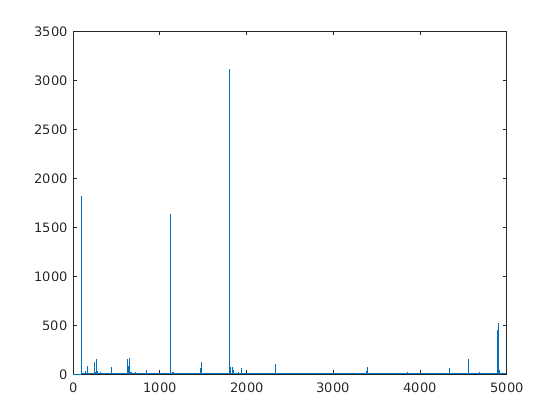

In [645]:
plot(1:i-1, err)

### Entrainement


ans =

    0.1444



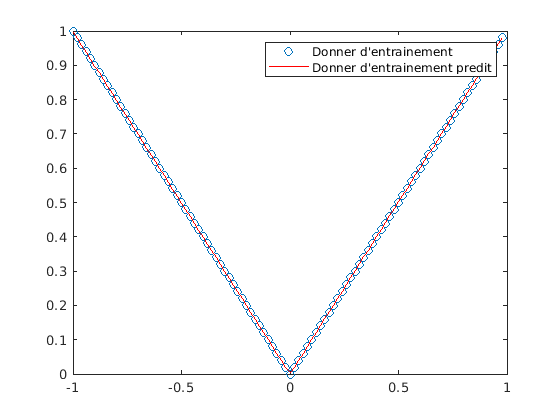

In [646]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Test

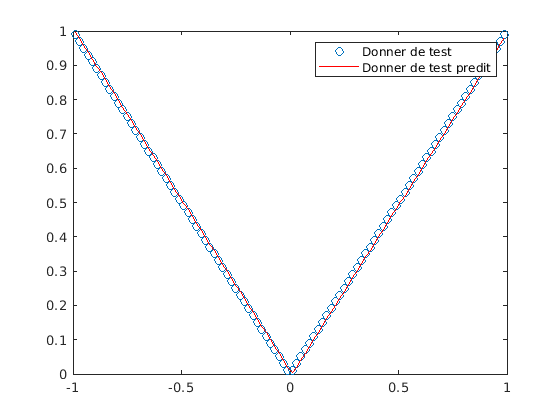

In [647]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

### FONCTION 2)

In [648]:
clear all;
% X = -1:0.01:0.99;
% X = X';
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
% X_train = [X_train,X_train,X_train];
X_test = X(2:2:end,:);
% X_test = [X_test,X_test,X_test];
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 5);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement equation normal

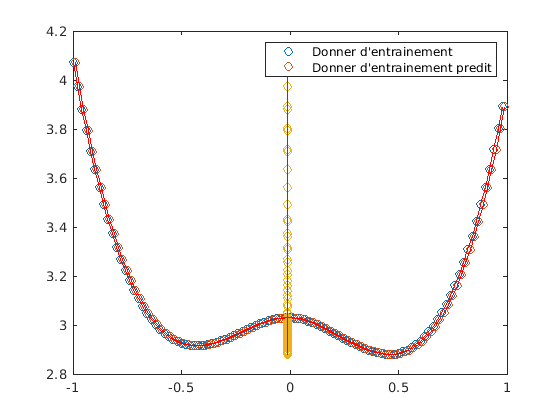

In [649]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [650]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.810964e-03
Nombre d'iteration : 10000

## Affichage Risque empirique 

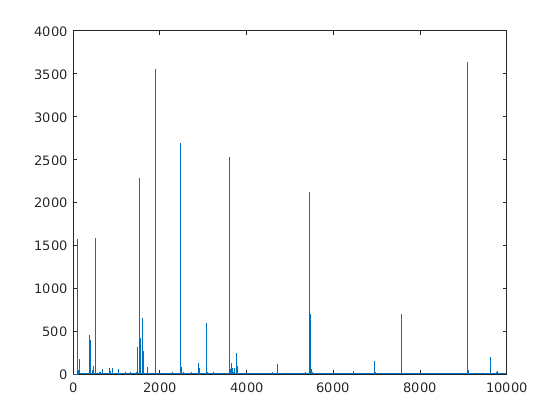

In [651]:
plot(1:i-1, err)

## Entrainement 


ans =

    0.1421



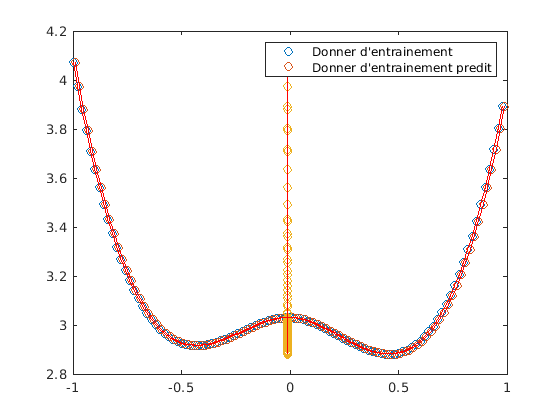

In [652]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

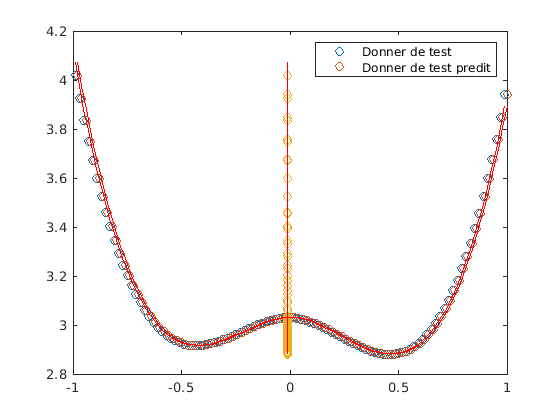

In [653]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 3)

In [654]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 5);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Entrainement d'equation normal



ans =

    0.3310



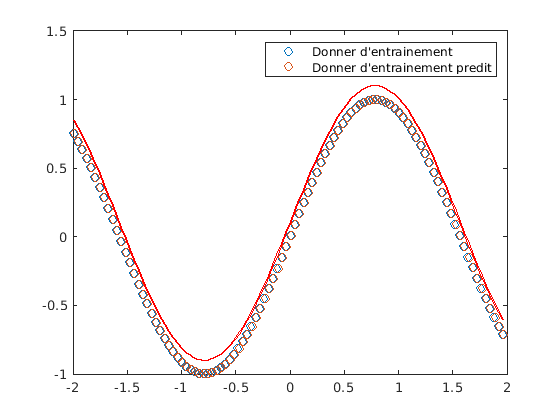

In [655]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [656]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.996605e-08
Nombre d'iteration : 10000

## Affichage de risque empirique

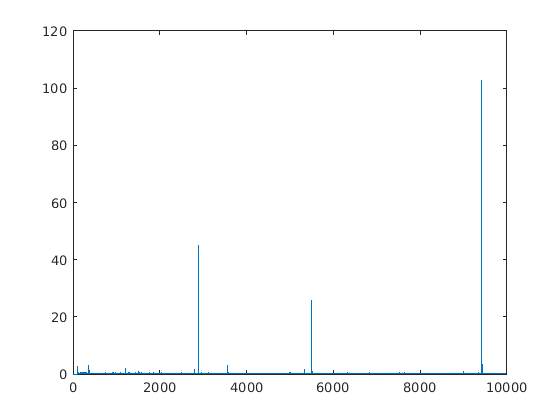

In [657]:
plot(1:i-1, err)

## Entrainement


ans =

    0.3310



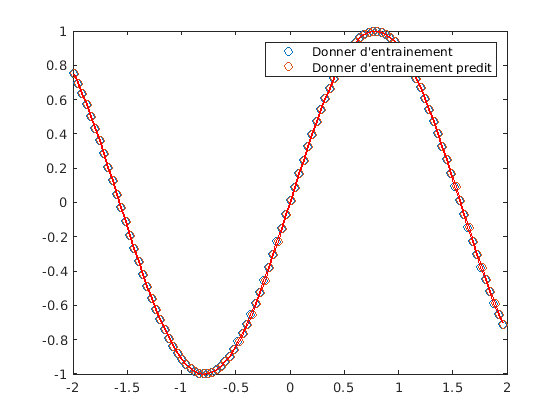

In [658]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

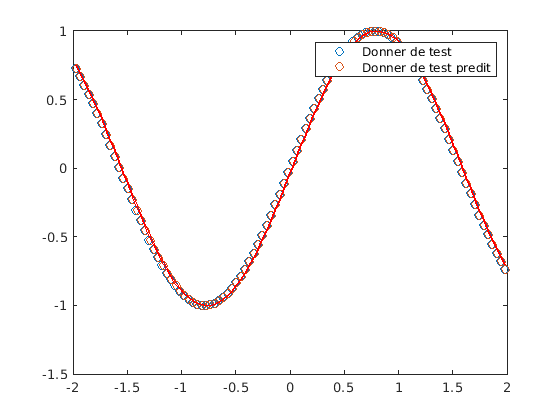

In [659]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end

y_test = modele(3, X_test);
y_test_predit = K * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 4)

In [660]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 5);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement d'equation normal

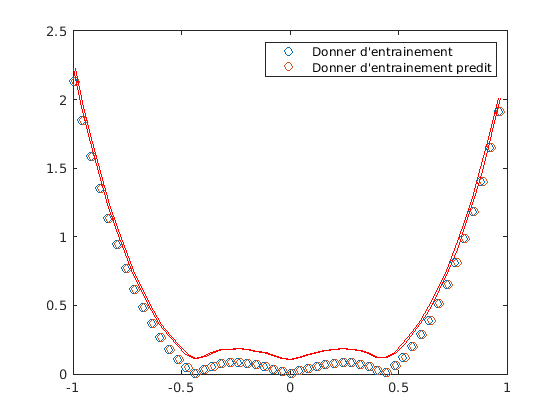

In [661]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [662]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 8.459196e-08
Nombre d'iteration : 50000

## Affichage de risque empirique

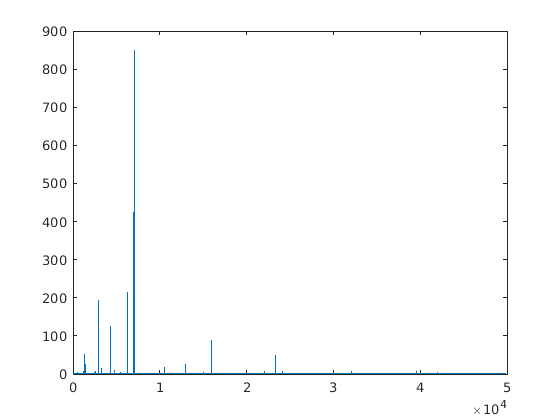

In [663]:
plot(1:i-1, err)

## Entrainement


ans =

    0.2968



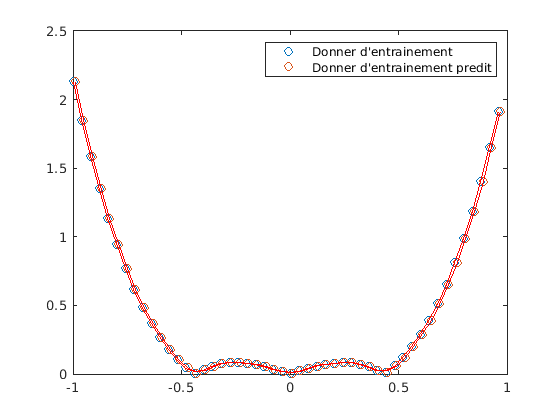

In [664]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## TEST

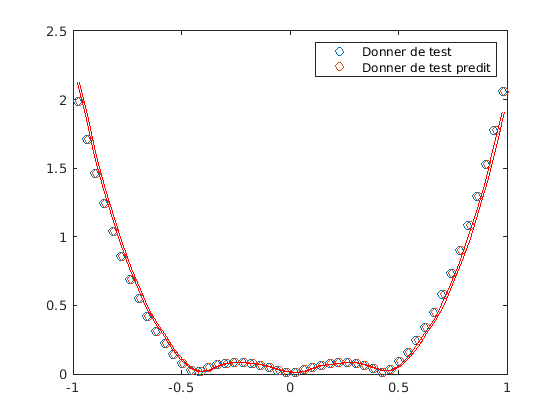

In [690]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 5);
  end  
end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Noyau sinc

# Fonction 1

In [731]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 6);
  end
end   
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement Equation normal 

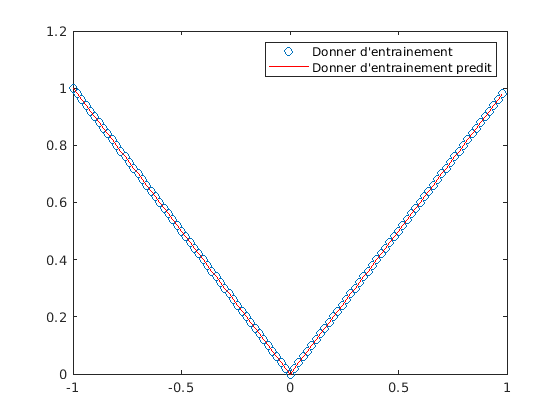

In [732]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r');
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off

## Gradiant decent

In [733]:
alpha = 1;
num_iterations = 5000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.477188e-14
Nombre d'iteration : 419

## Affichage de risque empirique

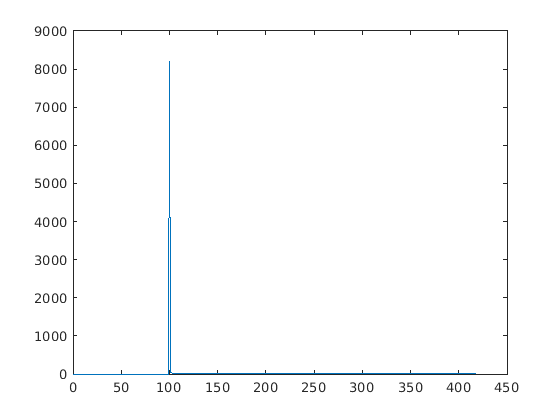

In [734]:
plot(1:i-1, err)

### Entrainement


ans =

    0.1444



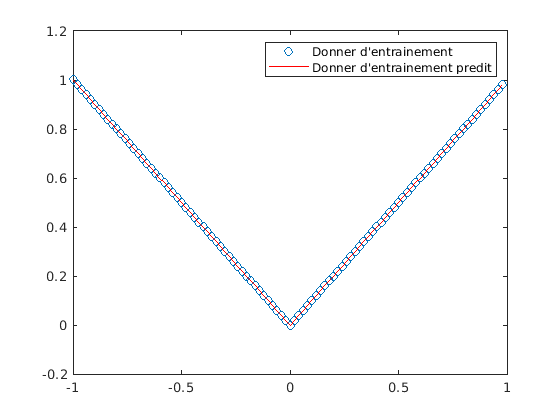

In [735]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');

hold off


## Test

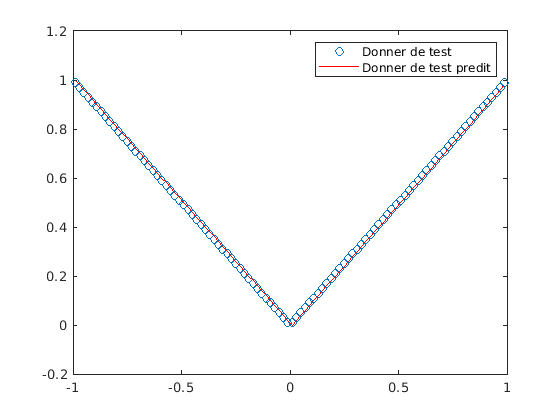

In [736]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
  y_test = modele(1, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

### FONCTION 2)

In [737]:
clear all;
% X = -1:0.01:0.99;
% X = X';
X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end,:);
% X_train = [X_train,X_train,X_train];
X_test = X(2:2:end,:);
% X_test = [X_test,X_test,X_test];
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement equation normal

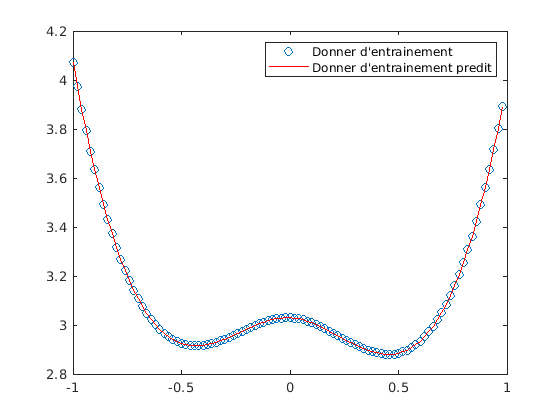

In [738]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train(:, 1), y_train,'o')
hold on
plot(X_train(:, 1), y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [740]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.294693e-14
Nombre d'iteration : 514

## Affichage Risque empirique 

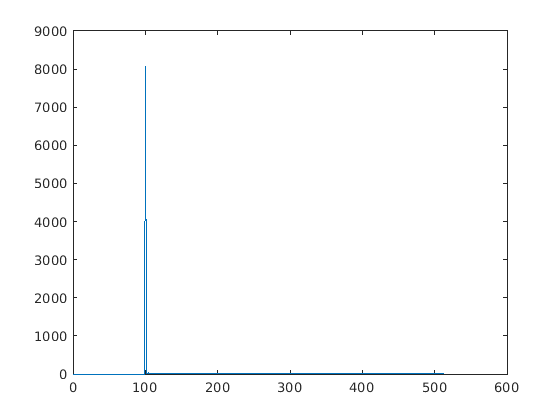

In [741]:
plot(1:i-1, err)

## Entrainement 


ans =

    0.1417



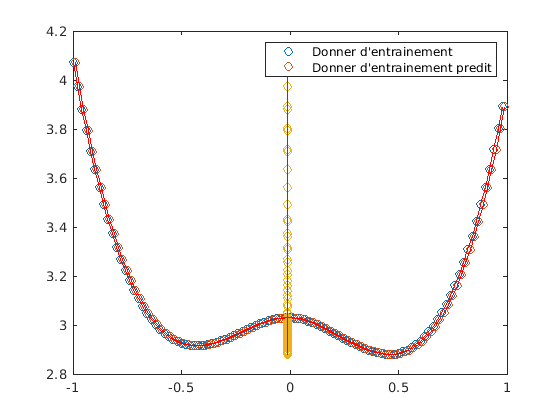

In [742]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = K * opt_omega;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

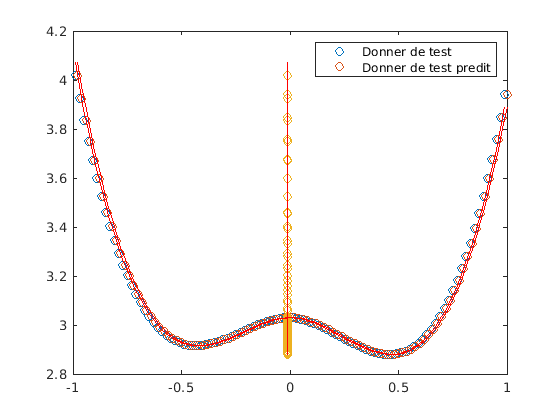

In [744]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
  y_test = modele(2, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');
hold off

# Fonction 3)

In [745]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 6);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);

## Entrainement d'equation normal


ans =

    0.3310



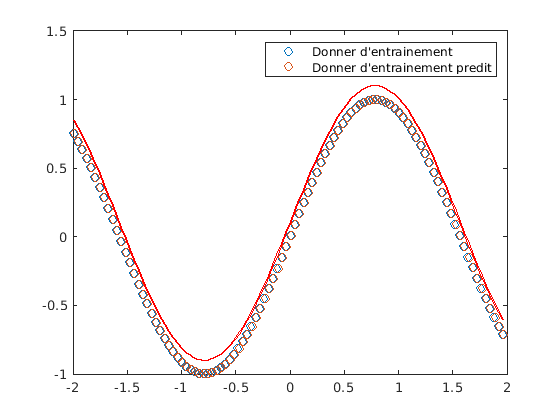

In [746]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et', 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [747]:
alpha = 1;
num_iterations = 10000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.432101e-14
Nombre d'iteration : 839

## Affichage de risque empirique

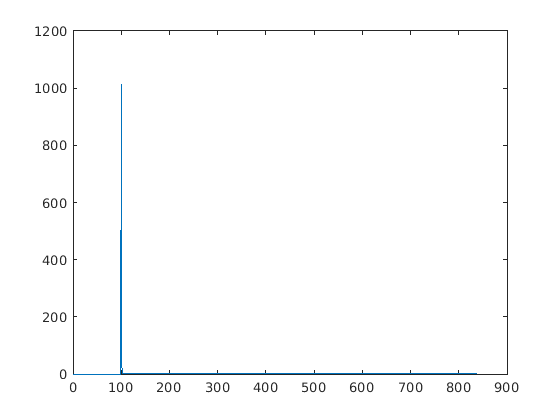

In [748]:
plot(1:i-1, err)

## Entrainement


ans =

    0.3310



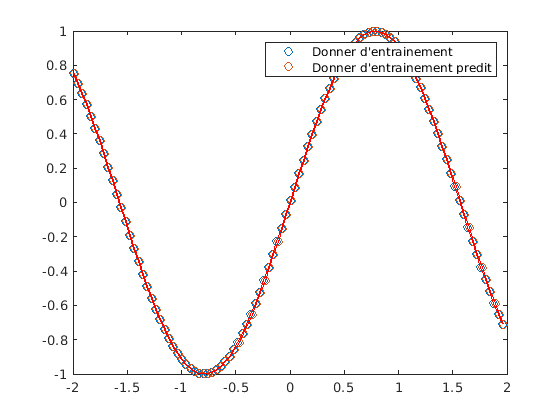

In [749]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## Test

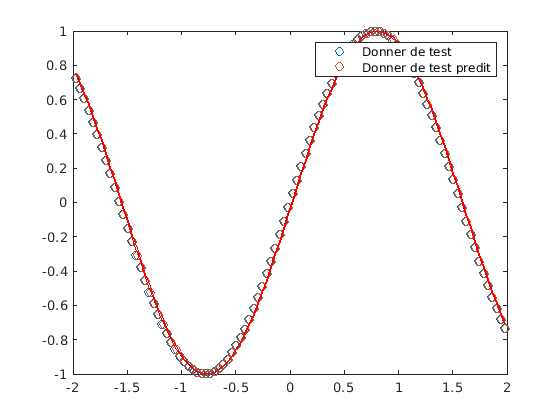

In [750]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(3, X_test);
y_test_predit = K * omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Fonction 4)

In [751]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2
  for j = 1:n2 
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 6);
  end
end  
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


## Entrainement d'equation normal

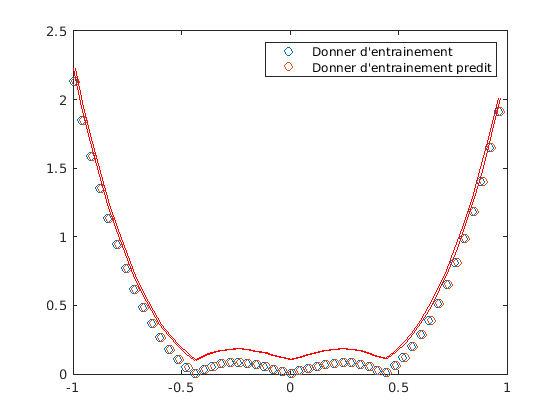

In [752]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_et, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

## Gradiant decent

In [753]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 6.946740e-14
Nombre d'iteration : 2336

## Affichage de risque empirique

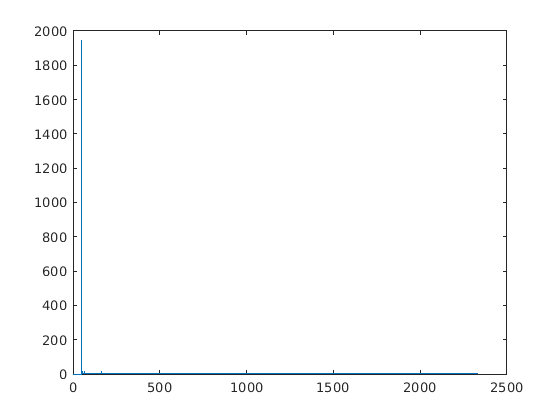

In [754]:
plot(1:i-1, err)

## Entrainement


ans =

    0.2968



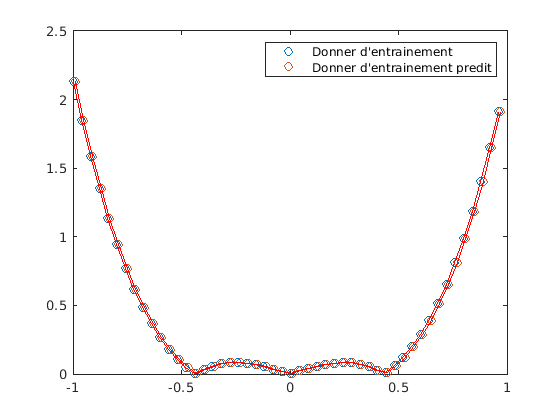

In [755]:
min_err = 0;
opt_omega = omega;
min_err = find(err == min(err));
% opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


## TEST

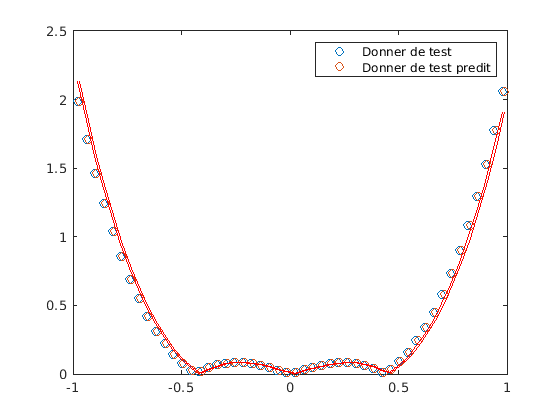

In [757]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off